In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import dirichlet
import attila_utils
#plt.rcParams['figure.dpi'] = 200

The average distance to platform was suggested as the most sensitive measure of test trial performance ([Maei et al 2009](https://doi.org/10.3389/neuro.07.004.2009)).

In [2]:
group2condition = {
    'A': 'WT',
    'B': '5xFAD',
    'C': '5xFAD + Amiloride',
}

fpath = '../../resources/QPS/5xFAD-mouse/amiloride-behavioral-data-cleaned.xlsx'
data_probe = pd.read_excel(fpath, sheet_name='rawdata MWM day 5', index_col='IRN')
data_probe['Condition'] = data_probe.Group.apply(lambda x: group2condition[x])
# read distance to platform
fpath = '../../resources/QPS/5xFAD-mouse/CO26990-MWM-mean-distance-to-platform.xlsx'
data_probe = pd.concat([data_probe, pd.read_excel(fpath, sheet_name='cleaned', index_col='IRN')[['Mean distance (cm)']]], axis=1).rename({'Mean distance (cm)': 'Avg. distance'}, axis=1)
data_probe

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition,Avg. distance
IRN,,,,,,,,,,
12913 A,I,A,f,2,18.90810,60.31960,5.19308,15.57920,WT,22.7148
12915 A,I,A,f,2,25.56590,19.30760,28.09590,27.03060,WT,46.3560
12937 A,II,A,f,2,20.90550,50.19970,10.78560,18.10920,WT,26.5461
12955 A,II,A,f,1,20.10650,21.30490,33.28890,25.29960,WT,40.5881
12957 A,II,A,f,1,44.60720,16.24500,5.72570,33.42210,WT,40.0740
12961 A,II,A,f,5,11.85090,62.31690,9.45406,16.37820,WT,20.5470
12967 A,II,A,f,3,8.38881,37.01730,35.68580,18.90810,WT,29.4471
12979 A,II,A,f,4,15.57920,47.13720,30.49270,6.79095,WT,24.9607
14138,I,A,m,3,14.78030,44.20770,26.23170,14.78030,WT,28.5177


In [3]:
group2condition2 = {
    'A': '5xFAD + Amiloride',
    'B': '5xFAD + HCQ',
    'C': '5xFAD + HCQ nano',
    'D': '5xFAD + vehicle [saline]',
    'E': '5xFAD + R-HCQ',
    'F': '5xFAD + S-HCQ',
    'G': '5xFAD + TUDCA',
    'H': 'WT + vehicle [saline]',
    'I': 'WT + TUDCA',
    'J': 'WT + vehicle [DMSO,...]',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28152-MWM-mean-distance-to-platform.xlsx'
data_probe2 = pd.read_excel(fpath, sheet_name='cleaned', index_col='IRN').rename({'Distance to Platform (cm)': 'Avg. distance'}, axis=1)
data_probe2['Condition'] = data_probe2.Group.apply(lambda x: group2condition2[x])
data_probe2

,Cohort,Group,Sex,Avg. distance,Condition
IRN,,,,,
15117,I,A,f,32.2977,5xFAD + Amiloride
15119,I,A,f,33.2805,5xFAD + Amiloride
15121,I,A,f,25.2674,5xFAD + Amiloride
14627 A,I,A,f,30.7050,5xFAD + Amiloride
14687 A,I,A,f,44.6826,5xFAD + Amiloride
...,...,...,...,...,...
16182,V,J,m,25.2954,"WT + vehicle [DMSO,...]"
16192,V,J,m,37.4667,"WT + vehicle [DMSO,...]"
16220,VI,J,m,30.1293,"WT + vehicle [DMSO,...]"


## Avg. distance to platform

['named-figure/avg-distance-to-platform-vs-fraction-of-time-target-quadrant.png',
 'named-figure/avg-distance-to-platform-vs-fraction-of-time-target-quadrant.pdf']

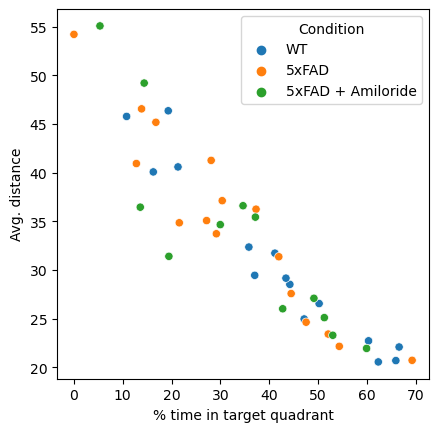

In [4]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=data_probe, y='Avg. distance', x='NE (%)', hue='Condition', ax=ax)
ax.set_xlabel('% time in target quadrant')
attila_utils.savefig(fig, 'avg-distance-to-platform-vs-fraction-of-time-target-quadrant')

['named-figure/avg-distance-to-platform-stripplot-anova.png',
 'named-figure/avg-distance-to-platform-stripplot-anova.pdf']

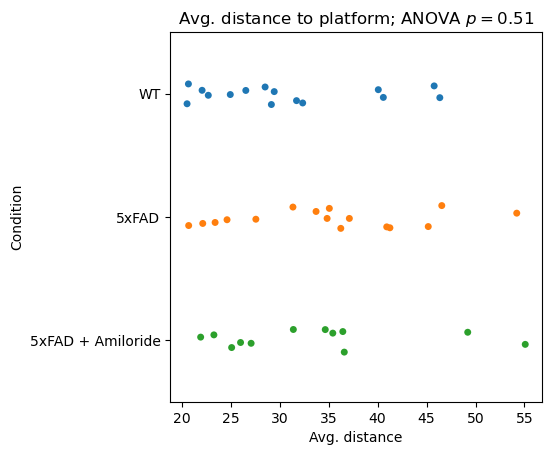

In [5]:
def my_anova(data_probe):
    dist = dict()
    for g in data_probe.Group.unique():
        dist.update({g: data_probe.loc[data_probe.Group == g, 'Avg. distance'].to_numpy()})
    statistic, pvalue = f_oneway(*dist.values())
    #statistic, pvalue = f_oneway(dist['A'], dist['B'], dist['C']) # the same
    return((statistic, pvalue))

def my_stripplot(data_probe):
    statistic, pvalue = my_anova(data_probe)
    fig, ax = plt.subplots(figsize=(4.8, 4.8))
    sns.stripplot(data=data_probe, x='Avg. distance', y='Condition', hue='Condition', ax=ax, legend=False)
    ax.set_title('Avg. distance to platform; ANOVA $p ={:1.2}$'.format(pvalue))
    return((fig, ax))

fig, ax = my_stripplot(data_probe)
attila_utils.savefig(fig, 'avg-distance-to-platform-stripplot-anova')

['named-figure/avg-distance-to-platform-stripplot-anova-CO28152.png',
 'named-figure/avg-distance-to-platform-stripplot-anova-CO28152.pdf']

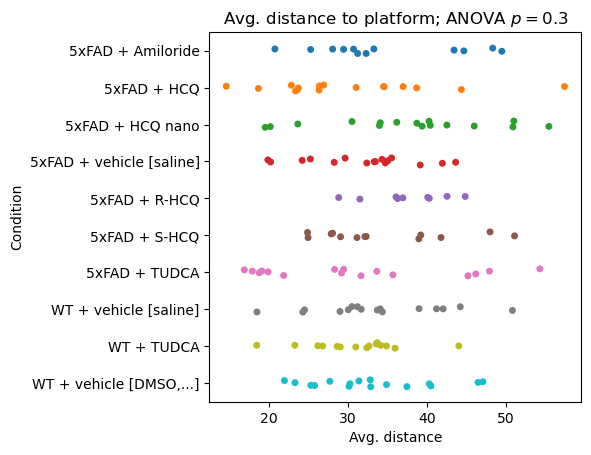

In [6]:
fig, ax = my_stripplot(data_probe2)
attila_utils.savefig(fig, 'avg-distance-to-platform-stripplot-anova-CO28152')

## Fraction of time in quadrants: Dirichlet


Result of the Dirichlet uniformity test for group WT:
# likelihood-ratio statistic (with MWM correction) = 14.3535
# p-value = 0.00246142
# MLE params under null hypothesis (uniformity)           :[2.02991233 2.02991233 2.02991233 2.02991233]
# MLE params under alternative hypothesis                 :[4.53177868 2.37172061 2.34260994 2.26527786]


/Users/jonesa7/tools/dirichlet.py:146: RuntimeWarning: divide by zero encountered in log
  logp = log(D).mean(axis=0)
/Users/jonesa7/tools/dirichlet.py:404: RuntimeWarning: invalid value encountered in double_scalars
  s1 = s0 * exp(-g/(s0*h + g)) # Newton on log s



Result of the Dirichlet uniformity test for group 5xFAD + Amiloride:
# likelihood-ratio statistic (with MWM correction) = 3.68336
# p-value = 0.297748
# MLE params under null hypothesis (uniformity)           :[1.787041 1.787041 1.787041 1.787041]
# MLE params under alternative hypothesis                 :[2.61028068 1.93986022 1.89460516 1.56812866]


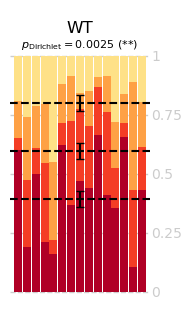

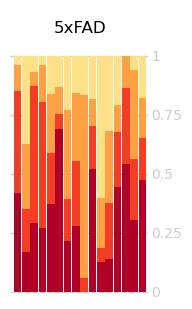

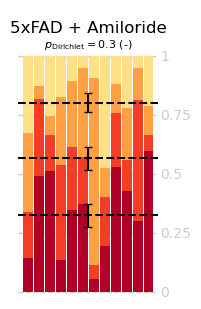

In [7]:
def extract_data4dirichlet(group, data_probe=data_probe):
    a = data_probe.loc[data_probe.Group == group, 'SE (%)':'SW (%)'].to_numpy()[:, [1, 2, 3, 0]]
    return(a)

def my_dirichlet_plot(group, do_test_uniform=True, data_probe=data_probe, group2condition=group2condition):
    a = extract_data4dirichlet(group, data_probe=data_probe)
    dirichlet.plot(a, label=group2condition[group], do_test_uniform=do_test_uniform, do_MWM_correction=True, verbose=True, save_figure='named-figure/dirichlet-plot-group-' + group + '.png')

for group in data_probe.Group.unique():
    try:
        my_dirichlet_plot(group, do_test_uniform=True)
    except:
        my_dirichlet_plot(group, do_test_uniform=False)

In [8]:
%connect_info

{
  "shell_port": 51840,
  "iopub_port": 51841,
  "stdin_port": 51842,
  "control_port": 51844,
  "hb_port": 51843,
  "ip": "127.0.0.1",
  "key": "b07fde86-f59025e73fd22dc1edf61896",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-4abf449e-5685-47c8-b92f-5a5097fa7306.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
